In [1]:
%matplotlib inline
import numpy as np
from forschungspraktikum.jiles_atherton.functions import jiles_atherton_H, jiles_atherton_B, langevin, grad_langevin
from scipy.constants import mu_0
from scipy import signal, integrate
import matplotlib.pyplot as plt

In [9]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.0003
a = 40.25
Msat = 350000
k = 80.0
c = 0.7


params = [alpha, a, Msat, k, c]
# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 25.0 # A, Strom
f = 1.0 # Hz, Frequenz
n = 4 # Anzahl Perioden
n_p = 1024# Datenpunkte pro Periode
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor

In [38]:
B = -0.4*signal.sawtooth(2*np.pi*t - np.pi/2, 0.5)
f_b, f_a = signal.bessel(6, 0.1, 'low')
#B = signal.lfilter(f_b, f_a, B)


M = np.zeros(B.size)
H = np.zeros(B.size)
B_ = B[::2]

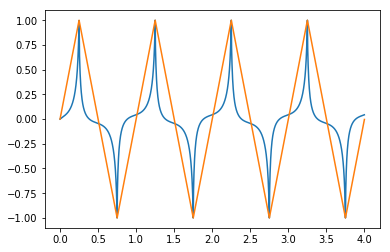

In [39]:
H_ = jiles_atherton_B(B, t, params)
M_ = B[::2]/mu_0 - H_
plt.plot(t[::2], H_/np.max(H_))
#np.savetxt("voltage_h.txt", np.array([t[::2], H_/np.max(H_)]).T)
plt.plot(t, B/np.max(B))
#np.savetxt("voltage_b.txt", np.array([t, B/np.max(B)]).T)

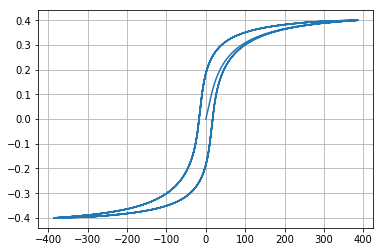

In [40]:
plt.plot(H_, B_)
#np.savetxt("single_hysteresis.txt", np.array([H_, B_]).T)
plt.grid()
plt.show()

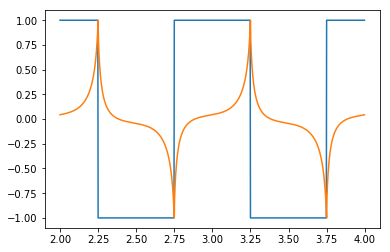

In [41]:
#plt.plot(t[::2], H_/np.max(H_))
#plt.plot(t, u/(np.max(u)))
u_ = np.diff(B)[::2]
x = u_*H_
plt.plot(t[::2][n_p:], u_[n_p:]/np.max(u_))
plt.plot(t[::2][n_p:], H_[n_p:]/np.max(H_))
plt.show()

/usr/local/miniconda3/envs/forschungspraktikum/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


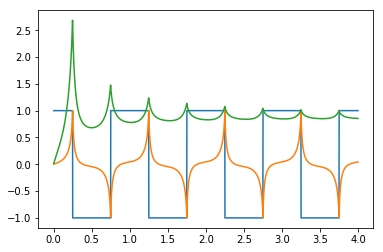

In [42]:

plt.plot(t[::2], u_/np.max(u_))
plt.plot(t[::2], H_/np.max(H_))
plt.plot(t[::2][-10000:], (np.cumsum(x)[:]/t[::2])[-10000:]/20)

In [43]:
np.mean(x)*n_p*f

34.170209604422155